<a href="https://colab.research.google.com/github/C-HARRIETH/HOUSE-PRICE-ANALYSIS/blob/main/Moringa_DS_Core_W7_Independent_Project_2021_04_Chebet_Harrieth_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOUSE PRICE ANALYSIS

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### b) Defining the Metric for Success

Success on this research will be reached when an accurate prediction model is reached at of at least 85 %

### c) Understanding the context 



Having been in the market for 25 years, the client acknowledges that there has been a lot of changes in what influences the prices of house. With an aim of staying on top of the market, Hass Consultancy Company has initiated the use of machine learning to predict the prices of houses. This will be done through regularization.

### d) Recording the Experimental Design

The experimental design taken is Independent measures done by random allocation.

### e) Data Relevance

The data provided is highly relevant and sufficient to the research because of the size and the content found in the columns.

## 2. Reading the Data

In [58]:
# Relevant dependencies 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Loading the Dataset

url= 'http://bit.ly/IndependentProjectWeek7Dataset'
house= pd.read_csv(url)


## 3. Checking the Data

In [60]:
# Determining the no. of records in our dataset

house.shape

(21613, 20)

In [61]:
# Previewing the top of our dataset

house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [62]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [63]:
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [64]:
house.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## 4. Tidying the Dataset

In [65]:
# Identifying the Missing Data

house.isnull().values.any()

False

In [66]:
# Identifying duplicates

house.duplicated().values.any()

True

In [67]:
# Number of duplicates

house.duplicated().sum()

3

In [68]:
# Dealing with duplicates

house.drop_duplicates(keep='first', inplace=True)

In [69]:
# Confirmation

house.duplicated().values.any()

False

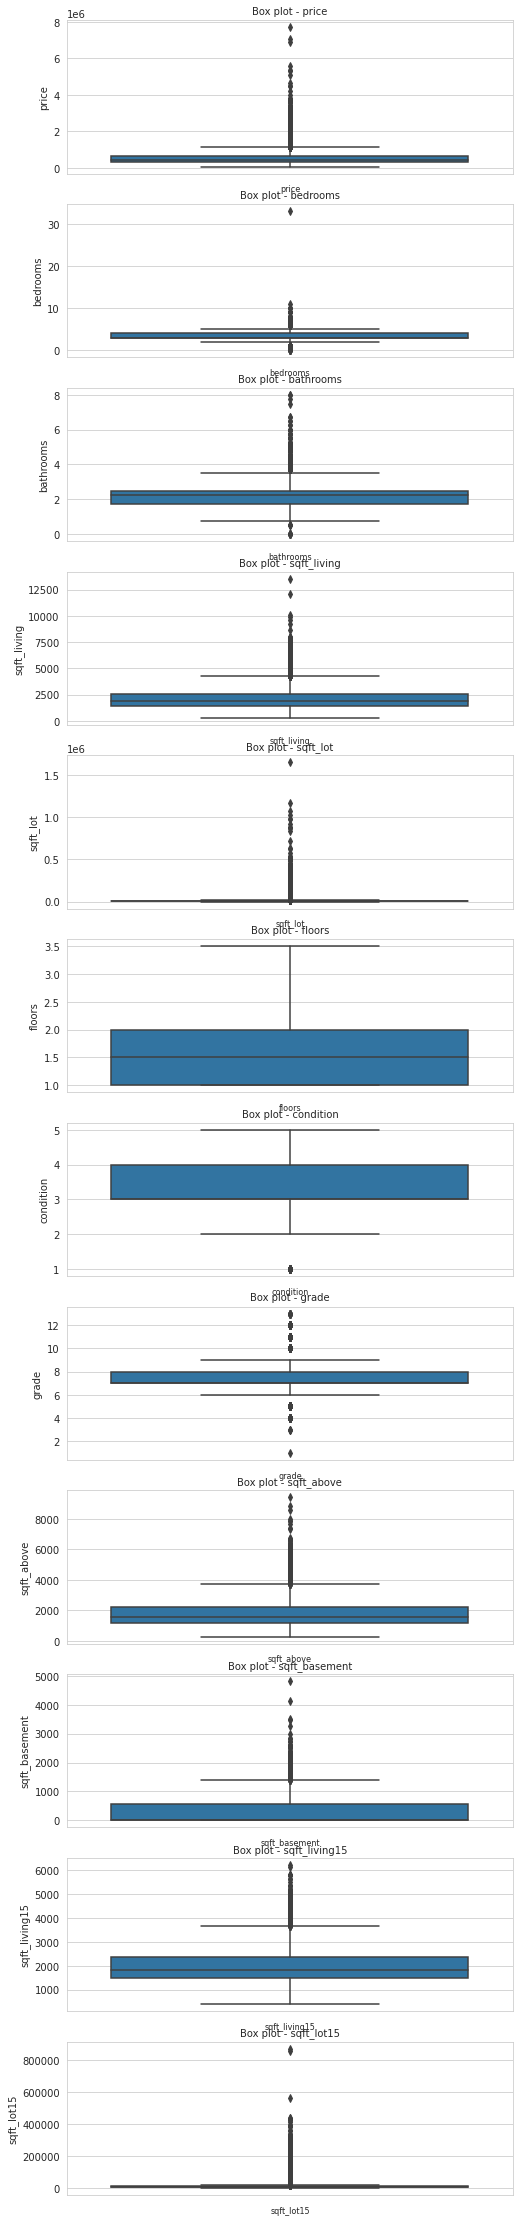

In [70]:
# Checking for Outliers

# Box plots to see the outliers

col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
             'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=house[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

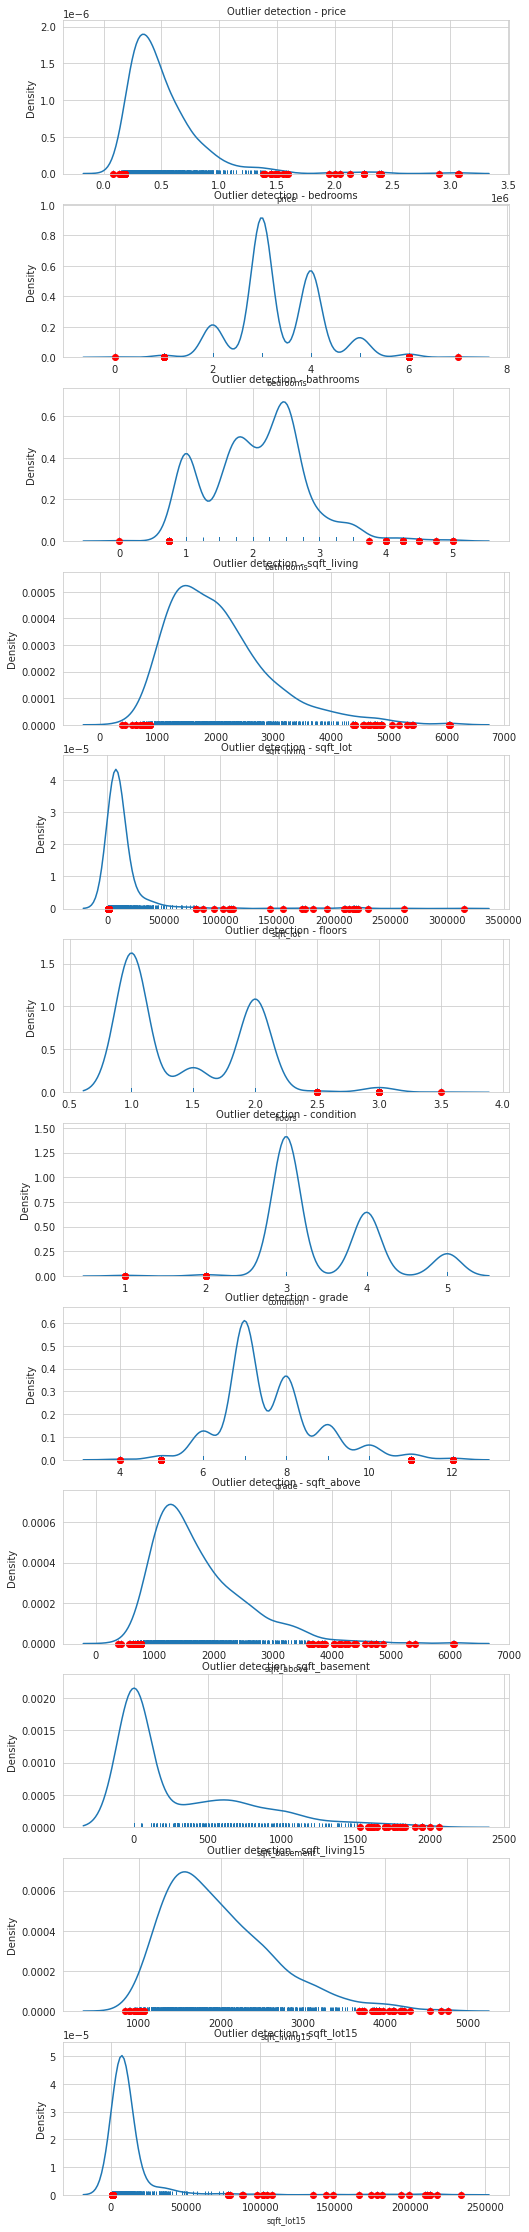

In [71]:
# Percentile based outlier removal 
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = house[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

## 5. Exploratory Analysis

### Univariate Analysis

In [72]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [73]:
house.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

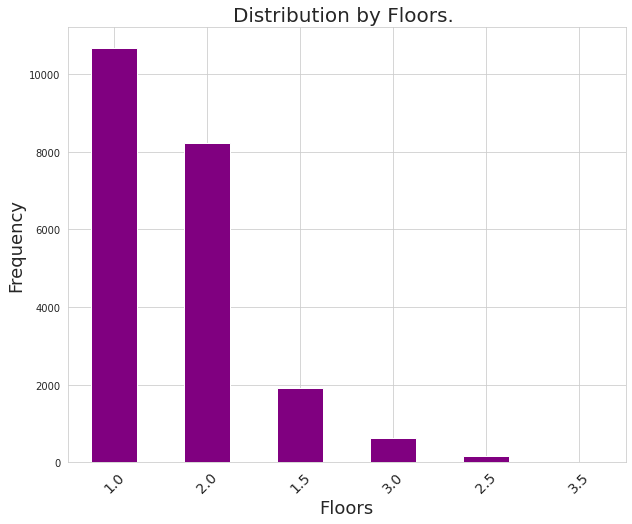

In [74]:
# Distribution by Floors

sns.set_style('whitegrid')

def bar(counter, xlabel): 

  sns.set_style('whitegrid')
  ax= plt.subplots(figsize= (10, 8))
  ax= counter.value_counts().plot.bar(color= 'purple')
  ax.set_ylabel('Frequency', fontdict={'size': 18})
  ax.set_xlabel(f"{xlabel}", fontsize= 18)
  plt.xticks(rotation= 45, fontsize= 14)
  ax.set_title(f"Distribution by {xlabel}. " , fontsize= 20)
  plt.show()

bar(house['floors'], "Floors")

In [75]:
house['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

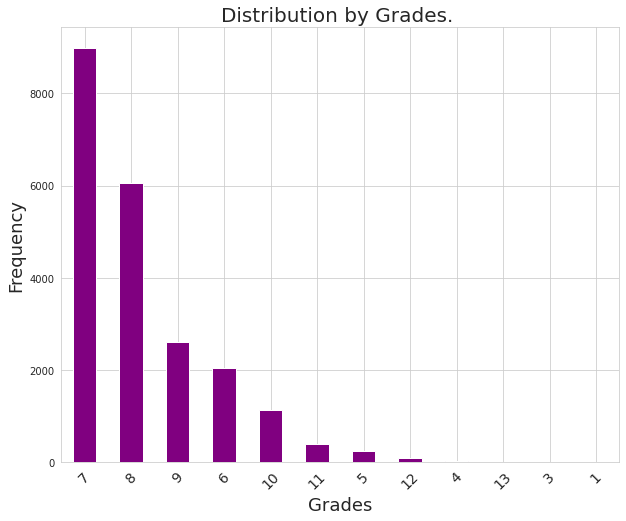

In [76]:
# Distribution by grade

bar(house['grade'], "Grades")

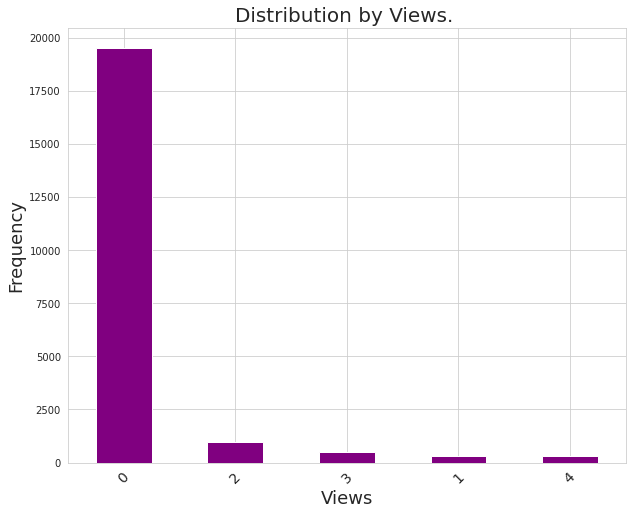

In [77]:
# Distribution by view

bar(house['view'], "Views")

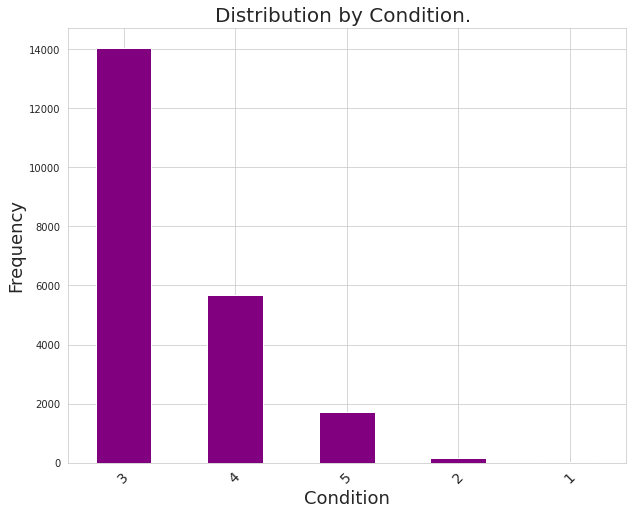

In [78]:
# Distribution by condition

bar(house['condition'], "Condition")

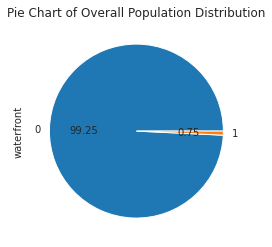

In [79]:
# Checking the number of households having waterfronts

house['waterfront'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Overall Population Distribution')
plt.show()

### Bivariate Analysis

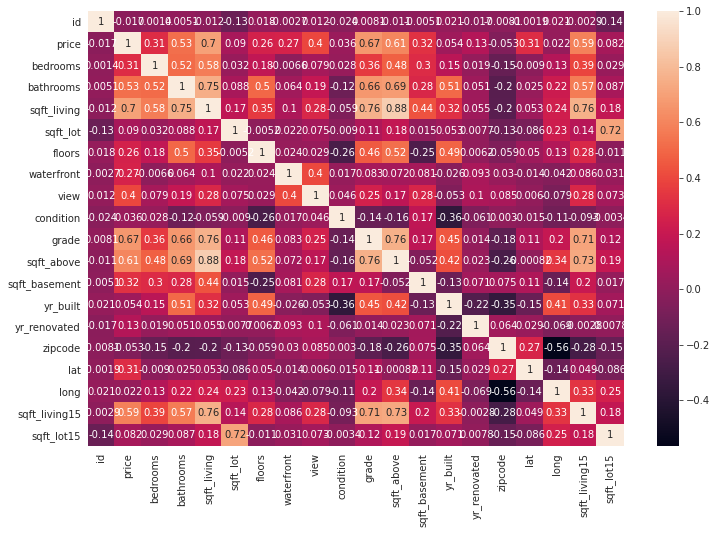

In [80]:
# Heat map showing correlation

plt.figure(figsize=(12, 8))

dfcorr = house.corr()
sns.heatmap(dfcorr, 
            xticklabels = dfcorr.columns.values,
            yticklabels = dfcorr.columns.values,
            annot = True);

In [81]:
house['sqft_lot'].corr(house['sqft_lot15'])

0.7185560943889518

In [82]:
house['sqft_living'].corr(house['sqft_living15'])

0.7564195702606058

In [83]:
# Dropping highly correlated columns

house.drop(['sqft_living15', 'sqft_lot15'], axis=1, inplace= True)

### Multivariate Analysis

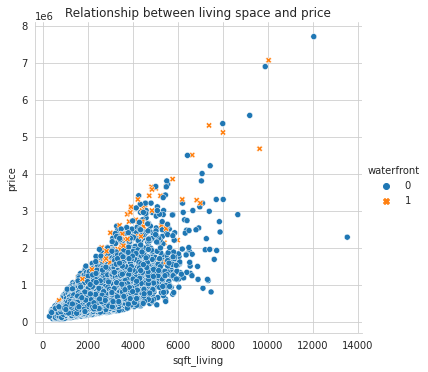

In [84]:
# relationship between living space and price

sns.relplot(
    data=house,
    x="sqft_living", y="price",
    hue="waterfront", style="waterfront"
)

plt.title('Relationship between living space and price')
plt.show()

The bigger the house, the more expensive it is. Houses having waterfronts are more costly than those without waterfronts.

## 6. Building Models

### Multiple Linear Regression

Multicollinearity

In [85]:
# Detecting multicollinearity

independent_var= house.drop('price', axis=1)
correlations = independent_var.corr()

# VIF scores
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.023013,-0.005246,-0.006233,5.736034e-03,0.147919,-0.016371,0.008070,-0.031985,0.024395,-0.036163,4.421404e-02,2.335468e-03,0.017681,0.018767,-0.003037,0.013768,-0.065519
bedrooms,-0.005246,1.648461,-0.465233,-6.033264e-01,0.106137,0.044203,0.063232,0.118215,-0.050386,0.313505,-3.093791e-01,-1.870883e-01,0.134996,0.045592,0.078674,0.050247,0.028035
bathrooms,-0.006233,-0.465233,3.345781,-3.100561e+00,0.021354,-0.686704,0.008941,-0.031394,-0.138873,-0.240736,1.579986e+00,4.345799e-01,-0.937174,-0.262979,0.035549,-0.039391,0.071304
sqft_living,0.005795,-0.603410,-3.105281,1.808269e+13,-0.089671,2.817384,-0.056831,-0.128286,-0.147199,-2.263883,-1.630373e+13,-8.713486e+12,0.491922,0.191371,-0.275208,-0.087781,0.088258
sqft_lot,0.147919,0.106137,0.021354,-8.952322e-02,1.124708,0.085183,0.014507,-0.060274,0.012800,0.013858,-1.907881e-01,-2.697322e-02,0.076243,0.006267,-0.019103,0.082811,-0.243042
floors,-0.016371,0.044203,-0.686704,2.819302e+00,0.085183,1.983967,-0.009991,-0.008946,0.083485,-0.148159,-2.896760e+00,-6.974220e-01,-0.487513,-0.088657,-0.189742,-0.120358,0.204710
waterfront,0.008070,0.063232,0.008941,-5.594392e-02,0.014507,-0.009991,1.202917,-0.487328,-0.014204,0.065883,-3.496684e-02,3.134789e-02,-0.022613,-0.067652,0.018650,0.011902,0.031860
view,-0.031985,0.118215,-0.031394,-1.292105e-01,-0.060274,-0.008946,-0.487328,1.400576,-0.013848,-0.283357,-1.586030e-02,-2.465106e-01,0.159314,-0.029044,-0.117651,0.108176,0.033522
condition,0.024395,-0.050386,-0.138873,-1.482864e-01,0.012800,0.083485,-0.014204,-0.013848,1.247854,-0.031754,2.266087e-01,-1.484147e-02,0.559594,0.204620,0.155773,0.066854,-0.001474
grade,-0.036163,0.313505,-0.240736,-2.266509e+00,0.013858,-0.148159,0.065883,-0.283357,-0.031754,3.138838,-3.369351e-02,4.626049e-01,-0.615284,-0.041483,0.147687,-0.360860,0.290337


sqfeet_basement has a VIF score of 4.19 which is the highest. 


In [86]:
# Dropping to observe the changes it brings

revised = independent_var.drop(columns=['sqft_basement'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long
id,1.023013,-0.005246,-0.006233,0.010653,0.147919,-0.016371,0.008070,-0.031985,0.024395,-0.036163,0.039764,0.017681,0.018767,-0.003037,0.013768,-0.065519
bedrooms,-0.005246,1.648461,-0.465233,-0.990259,0.106137,0.044203,0.063232,0.118215,-0.050386,0.313505,0.040211,0.134996,0.045592,0.078674,0.050247,0.028035
bathrooms,-0.006233,-0.465233,3.345781,-2.204096,0.021354,-0.686704,0.008941,-0.031394,-0.138873,-0.240736,0.769803,-0.937174,-0.262979,0.035549,-0.039391,0.071304
sqft_living,0.010653,-0.990259,-2.204096,8.323334,-0.145412,1.372500,0.009073,-0.640853,-0.179135,-1.306178,-5.251639,0.532267,0.002191,-0.100235,-0.196914,0.176020
sqft_lot,0.147919,0.106137,0.021354,-0.145412,1.124708,0.085183,0.014507,-0.060274,0.012800,0.013858,-0.140516,0.076243,0.006267,-0.019103,0.082811,-0.243042
floors,-0.016371,0.044203,-0.686704,1.372500,0.085183,1.983967,-0.009991,-0.008946,0.083485,-0.148159,-1.592651,-0.487513,-0.088657,-0.189742,-0.120358,0.204710
waterfront,0.008070,0.063232,0.008941,0.009073,0.014507,-0.009991,1.202917,-0.487328,-0.014204,0.065883,-0.093589,-0.022613,-0.067652,0.018650,0.011902,0.031860
view,-0.031985,0.118215,-0.031394,-0.640853,-0.060274,-0.008946,-0.487328,1.400576,-0.013848,-0.283357,0.445515,0.159314,-0.029044,-0.117651,0.108176,0.033522
condition,0.024395,-0.050386,-0.138873,-0.179135,0.012800,0.083485,-0.014204,-0.013848,1.247854,-0.031754,0.254492,0.559594,0.204620,0.155773,0.066854,-0.001474
grade,-0.036163,0.313505,-0.240736,-1.306178,0.013858,-0.148159,0.065883,-0.283357,-0.031754,3.138838,-0.899787,-0.615284,-0.041483,0.147687,-0.360860,0.290337


Dropping the sqfeet basement column increases VIF score of living upto 8.32 and that of sqfeet above upto 6.83. The others remain unaffected. Hence, it will be retained.

Residual Plots and heteroskedasticity tests.

In [103]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = independent_var
y = house['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction
y_pred = regressor.predict(X_test)

# residuals

residuals = np.subtract(y_pred, y_test)

# Describing our residuals:
pd.DataFrame(residuals).describe()

residuals.mean()

-3138.493839623085

In [88]:
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred - y_test) ** 2)))
print('Variance score: {0:.2f}'.format(regressor.score(X, y)))

Mean squared error: 38246049027.63
Variance score: 0.70


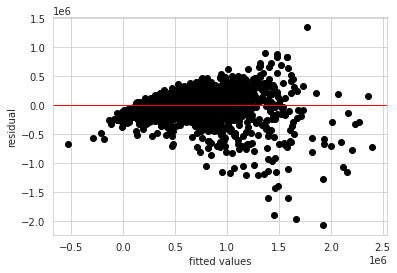

In [89]:
# plotting residuals

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The values are centered around the mean , close to 0. There are also no obvious observable patterns.

In [90]:
# Bartlett's test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing critical value
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [109]:
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 38771.449879447835,
 'bedrooms': -36126.42856945039,
 'condition': 26270.83222220419,
 'floors': 3983.1613046061907,
 'grade': 100088.90898441045,
 'id': -1.0500106271878611e-06,
 'lat': 605710.5721413956,
 'long': -208127.04266358513,
 'sqft_above': 73.8860217597693,
 'sqft_basement': 41.64787421544237,
 'sqft_living': 115.53389603149425,
 'sqft_lot': -0.051256404759788536,
 'view': 55434.66371993778,
 'waterfront': 636189.2390418012,
 'yr_built': -2587.4552175831514,
 'yr_renovated': 18.144666634971568,
 'zipcode': -597.7966827077081}

### Quantile Regression

In [96]:
# Implementing Quantile regression for the 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('price ~  bedrooms + sqft_living + floors + waterfront + view + condition ', data=house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2927
Model:                       QuantReg   Bandwidth:                   2.940e+04
Method:                 Least Squares   Sparsity:                    4.325e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21610
Time:                        11:54:30   Df Residuals:                    21603
                                        Df Model:                            6
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.794e+04   1.09e+04     -2.572      0.010   -4.92e+04   -6645.012
bedrooms    -4.712e+04   1956.726    -24.083      0.000    -5.1e+04   -4.33e+04
sqft_living   232.5229      2.168    107.246      0.000     228.273     236.773
floors       3.957e+04   3024.623     13.083   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [92]:
mod = smf.quantreg('price ~ grade +  sqft_above + sqft_basement + yr_built + yr_renovated + zipcode  ', data=house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3663
Model:                       QuantReg   Bandwidth:                   2.541e+04
Method:                 Least Squares   Sparsity:                    3.491e+05
Date:                Fri, 16 Apr 2021   No. Observations:                21610
Time:                        11:51:41   Df Residuals:                    21603
                                        Df Model:                            6
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        59.9249      0.100    599.867      0.000      59.729      60.121
grade          1.314e+05   1689.764     77.744      0.000    1.28e+05    1.35e+05
sqft_above      110.7168      2.295     48.232      0.000     106.217     115.216
sqft_basement   129.2866      2.896  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [97]:
# Other quantiles

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['sqft_living']] + res.conf_int().loc['sqft_living'].tolist())

# Making a dataframe of the same name to view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

    qt     intercept      x_coef  cf_lower_bound  cf_upper_bound
0  0.1 -13064.357934  126.481652      124.060525      128.902778
1  0.2  -1448.406510  159.028832      156.089708      161.967955
2  0.3 -20193.921003  191.033435      187.488923      194.577947
3  0.4 -24571.718485  214.749662      210.623625      218.875698
4  0.5 -27937.970949  232.522899      228.273217      236.772580
5  0.6 -28664.130791  240.733696      236.381663      245.085729
6  0.7 -22481.230999  254.577151      249.657141      259.497161
7  0.8 -15373.759148  283.300199      276.928334      289.672064
8  0.9  14178.937928  363.013698      353.131031      372.896365


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [98]:
x_ = house['sqft_living'].values.reshape(-1,1)
y_ = house['price'].values
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

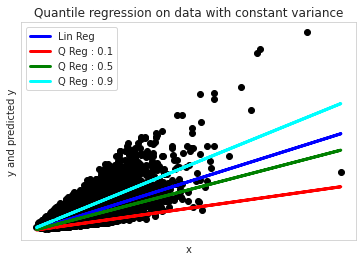

In [99]:
# Plotting the 0.1th, 0.5th and 0.9th quantile models against the original data.

plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['sqft_living'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['sqft_living'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['sqft_living'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with constant variance")
plt.legend()

<Figure size 432x288 with 0 Axes>

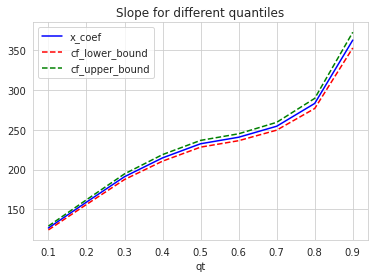

In [100]:
# Changes in the quantile coeffiecients

plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

### Ridge Regression

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [42]:
# Creating ridge model
ridge = Ridge(normalize=True)

# Setting up grid to be used
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [43]:
# Running the model
search.fit(X,y)

# Gives an alpha to set parameter
search.best_params_

{'alpha': 0.01}

In [44]:
# Gives a possible mean squared error
abs(search.best_score_) 

41027213536.629364

In [45]:
# Fitting model with the ridge information and finding 
# the mean squared error 

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X, y)
second_model = (mean_squared_error(y_true=y, y_pred=ridge.predict(X)))
print(second_model)

40630543332.268036


In [105]:
# Getting coefficients

coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 38588.146512225336,
 'bedrooms': -34930.31230344774,
 'condition': 26596.755999650333,
 'floors': 4284.93807263462,
 'grade': 98741.97471361628,
 'id': -1.0395751758665727e-06,
 'lat': 601583.6282065584,
 'long': -204606.3988406873,
 'sqft_above': 95.7805560379941,
 'sqft_basement': 64.27475872272599,
 'sqft_living': 92.63047029278471,
 'sqft_lot': -0.04651902169431529,
 'view': 55742.79838459946,
 'waterfront': 631155.0811774923,
 'yr_built': -2524.9124799059578,
 'yr_renovated': 19.1049903718301,
 'zipcode': -578.8568510831078}

### Lasso Regression

In [47]:
from sklearn import linear_model

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6989995607903927
lasso MSE: 40625244199.886055
lasso coef: [-1.14653348e-06 -3.54567241e+04  4.09636735e+04  2.94608326e+02
 -6.46983040e-02  5.07008700e+03  5.78145762e+05  5.51701492e+04
  2.55692196e+04  1.00088602e+05 -1.05564617e+02 -1.39970855e+02
 -2.64224157e+03  1.84460418e+01 -6.02537011e+02  6.07033781e+05
 -2.06352737e+05]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402977851786424.25, tolerance: 291664533601.623
  positive)


In [48]:
# Choosing regularization parameter
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

# Building lasso
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249152853336194.44, tolerance: 180055535788.74796
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261410662787199.8, tolerance: 188261253852.63318
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262187231801521.8, tolerance: 188394447041.89603
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27102764

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7090837549238393
linear score: 0.7089788899451996
lasso MSE: 38232267652.415474
linear MSE: 38246049027.634544
lasso best estimator coef: [-1.05504169e-06 -3.61003753e+04  3.86937839e+04  2.95005041e+02
 -5.26991317e-02  3.96778368e+03  6.32469237e+05  5.55486091e+04
  2.61927987e+04  1.00136413e+05 -1.05598494e+02 -1.37710540e+02
 -2.59045409e+03  1.81631524e+01 -5.94422064e+02  6.04173318e+05
 -2.06031166e+05]
linear coef: [-1.05001063e-06 -3.61264286e+04  3.87714499e+04  1.15533896e+02
 -5.12564048e-02  3.98316130e+03  6.36189239e+05  5.54346637e+04
  2.62708322e+04  1.00088909e+05  7.38860218e+01  4.16478742e+01
 -2.58745522e+03  1.81446666e+01 -5.97796683e+02  6.05710572e+05
 -2.08127043e+05]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328745226479557.44, tolerance: 234859002823.03656
  positive)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356632959422827.1, tolerance: 234859002823.03656
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328067319383929.25, tolerance: 234859002823.03656
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.

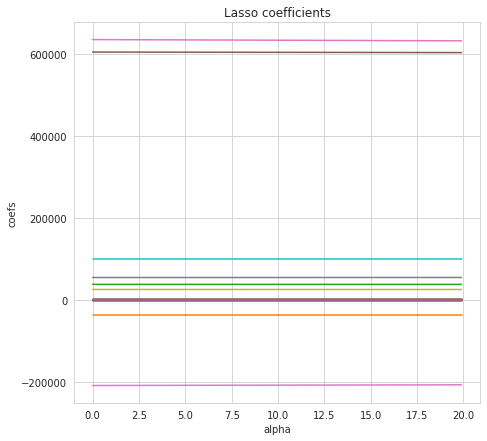

In [49]:
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


### Elastic Net Regression

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
# Linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y, y_pred=regression.predict(X)))
print(first_model) 

40625243894.9955


In [52]:
# Elastic net model
elastic=ElasticNet(normalize=True)

# Create grid
search=GridSearchCV(estimator=elastic, param_grid={'alpha':np.logspace(-5,2,8),
                                                   'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [53]:
# fitting model
search.fit(X,y)

# getting best parameters to use
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [54]:
# Expected MSE
abs(search.best_score_)

41058763710.108444

In [55]:
# setting hyperparameter to the recommended value

elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

40713669545.91114


In [106]:
# Coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40016.554782823936,
 'bedrooms': -30511.610838921555,
 'condition': 26722.56882835155,
 'floors': 6458.848650067141,
 'grade': 94733.5968784694,
 'id': -1.1111438667960504e-06,
 'lat': 589329.5296209888,
 'long': -192372.69032381818,
 'sqft_above': 93.87441093633142,
 'sqft_basement': 62.77299153303349,
 'sqft_living': 90.88809995804397,
 'sqft_lot': -0.0445947957138903,
 'view': 56198.29285877203,
 'waterfront': 559900.6918679022,
 'yr_built': -2390.673119493294,
 'yr_renovated': 22.12586190291185,
 'zipcode': -526.3020001455717}

## 7. Challenging the solution

> There was a small change observed in the coefficients from the models used. Other than that,Lasso Regression had the smallest MSE showing that Lasso would be the best model for this particular dataset. 

- Multiple Linear Regression: 38246049027.63
- Ridge Regression: 40630543332.268036
- Lasso Regression: 38232267652.415474
- Elastic Net Regression: 40713669545.91114

In all the regression models used, parking lot in square feet had a very low  coefficient, near zero. Meaning, it did not influence the models as much. The columns containing square feet and id had low coefficients as well. 




